# Introduction to Data Science 2025

# Week 6: Recap

## Exercise 1 | Linear regression with feature selection

Download the [TED Talks](https://www.kaggle.com/rounakbanik/ted-talks) dataset from Kaggle. Your task is to predict both the ratings and the number of views of a given TED talk. You should focus only on the <span style="font-weight: bold">ted_main</span> table.

1. Download the data, extract the following ratings from column <span style="font-weight: bold">ratings</span>: <span style="font-weight: bold">Funny</span>, <span style="font-weight: bold">Confusing</span>, <span style="font-weight: bold">Inspiring</span>. Store these values into respective columns so that they are easier to access. Next, extract the tags from column <span style="font-weight: bold">tags</span>. Count the number of occurrences of each tag and select the top-100 most common tags. Create a binary variable for each of these and include them in your data table, so that you can directly see whether a given tag (among the top-100 tags) is used in a given TED talk or not. The dataset you compose should have dimension (2550, 104), and comprise of the 'views' column, the three columns with counts of "Funny", "Confusing and "Inspiring" ratings, and 100 columns which one-hot encode the top-100 most common tag columns.


In [2]:
# Use this cell for your code
import kagglehub
import pandas as pd
import ast

path = kagglehub.dataset_download("rounakbanik/ted-talks")

ted = pd.read_csv(f"{path}/ted_main.csv")

def extract_ratings(ratings_str):
    ratings_list = ast.literal_eval(ratings_str)
    rating_dict = {r['name']: r['count'] for r in ratings_list}
    return {
        'Funny': rating_dict.get('Funny', 0),
        'Confusing': rating_dict.get('Confusing', 0),
        'Inspiring': rating_dict.get('Inspiring', 0)
    }

ratings_df = ted['ratings'].apply(extract_ratings).apply(pd.Series)
ted = pd.concat([ted, ratings_df], axis=1)

ted['tags'] = ted['tags'].apply(ast.literal_eval)

all_tags = [tag for sublist in ted['tags'] for tag in sublist]
tag_counts = pd.Series(all_tags).value_counts().head(100)

for tag in tag_counts.index:
    ted[tag] = ted['tags'].apply(lambda x: 1 if tag in x else 0)

selected_cols = ['views', 'Funny', 'Confusing', 'Inspiring'] + list(tag_counts.index)
final_df = ted[selected_cols]

print("Final dataset shape:", final_df.shape)

final_df.head()

Final dataset shape: (2550, 104)


/tmp/ipykernel_32263/798204270.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ted[tag] = ted['tags'].apply(lambda x: 1 if tag in x else 0)
/tmp/ipykernel_32263/798204270.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ted[tag] = ted['tags'].apply(lambda x: 1 if tag in x else 0)
/tmp/ipykernel_32263/798204270.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

,views,Funny,Confusing,Inspiring,technology,science,global issues,culture,TEDx,design,...,food,religion,peace,family,ecology,demo,poetry,illness,universe,energy
0,47227110,19645,242,24924,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3200520,544,62,413,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1636292,964,27,230,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1697550,59,32,1070,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12005869,1390,72,2893,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


2. Construct a linear regression model to predict the number of views based on the data in the <span style="font-weight: bold">ted_main</span> table, including the binary variables for the top-100 tags that you just created.

In [3]:
# Use this cell for your code
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = final_df.drop(columns=['views'])
y = final_df['views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"  RMSE: {rmse:,.2f}")
print(f"  R² Score: {r2:.4f}")

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nTop 10 features positively correlated with views:")
print(coef_df.head(10))

print("\nTop 10 features negatively correlated with views:")
print(coef_df.tail(10))


Linear Regression Results:
  RMSE: 1,123,480.19
  R² Score: 0.6749

Top 10 features positively correlated with views:
              Feature    Coefficient
98               demo  962297.409277
56        photography  417957.585333
82         motivation  395333.293680
37         psychology  395011.244492
101          universe  391036.279795
87             robots  358812.234573
96             family  271996.990470
68          potential  254195.736307
55   medical research  251302.251272
25              brain  233171.384633

Top 10 features negatively correlated with views:
          Feature    Coefficient
5   global issues -254034.266001
44      computers -255017.469400
31       children -275322.976606
67          green -301894.888435
18     creativity -344127.143168
69      happiness -416420.774719
94       religion -421727.697937
89        poverty -437779.385113
45           life -478065.070543
80     philosophy -537130.449278


3. Do the same for the <span style="font-weight: bold">Funny</span>, <span style="font-weight: bold">Confusing</span>, and <span style="font-weight: bold">Inspiring</span> ratings.

In [4]:
# Use this cell for your code
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = final_df.drop(columns=['Funny', 'Confusing', 'Inspiring'])

y = final_df[['Funny', 'Confusing', 'Inspiring']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_model = MultiOutputRegressor(LinearRegression())
multi_model.fit(X_train, y_train)

y_pred = multi_model.predict(X_test)

for i, col in enumerate(y.columns):
    mse = mean_squared_error(y_test[col], y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test[col], y_pred[:, i])
    print(f"\n{col} Rating Prediction:")
    print(f"  RMSE: {rmse:,.2f}")
    print(f"  R² Score: {r2:.4f}")

model_inspiring = multi_model.estimators_[2]
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_inspiring.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nTop 10 features positively correlated with 'Inspiring':")
print(coef_df.head(10))

print("\nTop 10 features negatively correlated with 'Inspiring':")
print(coef_df.tail(10))



Funny Rating Prediction:
  RMSE: 285.24
  R² Score: 0.3941

Confusing Rating Prediction:
  RMSE: 25.76
  R² Score: 0.2672

Inspiring Rating Prediction:
  RMSE: 637.65
  R² Score: 0.5572

Top 10 features positively correlated with 'Inspiring':
          Feature  Coefficient
88  mental health   531.350180
43           life   397.293277
67      happiness   336.770271
25      education   295.244650
97         poetry   268.880330
16     creativity   261.989386
42      computers   216.553743
93          peace   211.986605
98        illness   192.566502
7        business   188.199429

Top 10 features negatively correlated with 'Inspiring':
             Feature  Coefficient
99          universe  -160.210430
73         evolution  -179.908902
86          language  -195.212681
94            family  -195.813655
53  medical research  -210.756771
69              mind  -235.304879
21         economics  -237.961623
55      neuroscience  -294.246995
96              demo  -342.501263
47             hum

4. You will probably notice that most of the tags are not useful in predicting the views and the ratings. You should use some kind of variable selection to prune the set of tags that are included in the model. You can use for example classical p-values or more modern [LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics)) techniques. Which tags are the best predictors of each of the response variables?

In [6]:
# Use this cell for your code
from sklearn.linear_model import LassoCV
import numpy as np
import pandas as pd

tag_columns = final_df.columns[4:] 
X = final_df[tag_columns]
y_views = final_df['views']
y_funny = final_df['Funny']
y_confusing = final_df['Confusing']
y_inspiring = final_df['Inspiring']


def lasso_feature_selection(X, y, target_name):
    lasso = LassoCV(cv=5, random_state=42, n_alphas=100, max_iter=5000)
    lasso.fit(X, y)
    
    coef = pd.Series(lasso.coef_, index=X.columns)
    selected = coef[coef != 0].sort_values(ascending=False)
    
    print(f"\n Top predictors for '{target_name}':")
    print(selected.head(10))
    print(f"\nNumber of selected features: {len(selected)}")
    return selected

selected_views = lasso_feature_selection(X, y_views, "views")
selected_funny = lasso_feature_selection(X, y_funny, "Funny")
selected_confusing = lasso_feature_selection(X, y_confusing, "Confusing")
selected_inspiring = lasso_feature_selection(X, y_inspiring, "Inspiring")


/home/kazan/Desktop/IntroToDS/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1622: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(
/home/kazan/Desktop/IntroToDS/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1622: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(



 Top predictors for 'views':
psychology       1.547282e+06
work             7.895974e+05
motivation       5.747320e+05
culture          5.642394e+05
brain            4.908181e+05
demo             4.324695e+05
humor            2.986529e+05
education        2.924200e+05
business         2.702778e+05
mental health    2.585914e+05
dtype: float64

Number of selected features: 36

 Top predictors for 'Funny':
humor            713.548161
entertainment    123.734456
psychology       119.639188
work             110.651047
culture          110.321900
creativity        97.136025
education         73.676524
children          58.942463
happiness         20.567579
motivation         1.093646
dtype: float64

Number of selected features: 16

 Top predictors for 'Confusing':
evolution        16.194701
philosophy       15.329317
religion         12.876535
physics          12.636922
psychology       11.316565
brain            10.874821
culture           9.024825
math              8.802254
entertainment 

/home/kazan/Desktop/IntroToDS/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1622: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(
/home/kazan/Desktop/IntroToDS/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1622: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(



 Top predictors for 'Inspiring':
psychology       694.919514
work             447.515318
mental health    436.239432
education        360.306261
happiness        298.407098
business         236.146013
creativity       235.567983
motivation       231.350991
culture          220.565603
life              78.829911
dtype: float64

Number of selected features: 22


5. Produce summaries of your results. Could you recommend good tags – or tags to avoid! – for speakers targeting plenty of views and/or certain ratings?

In [ ]:
# work and psychology seem to be ranking highly in most categories, those are the ones i would personally recommend

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Symbol classification (part 2)

Note that it is strongly recommended to use Python in this exercise. However, if you can find a suitable AutoML implementation for your favorite language (e.g [here](http://h2o-release.s3.amazonaws.com/h2o/master/3888/docs-website/h2o-docs/automl.html) seems to be one for R) then you are free to use that language as well.

Use the preprocessed data from week 3 (you can also produce them using the example solutions of week 3).

1. This time train a *random forest classifier* on the data. A random forest is a collection of *decision trees*, which makes it an *ensemble* of classifiers. Each tree uses a random subset of the features to make its prediction. Without tuning any parameters, how is the accuracy?

In [ ]:
# Use this cell for your code
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sys
import os

sys.path.append('../week3')
print(os.listdir('../week3'))
from week3data import training_data, test_data, train_target, test_target, lr

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(training_data, train_target)

rf_pred = rf_model.predict(test_data)

accuracy = accuracy_score(test_target, rf_pred)
print("Random Forest Accuracy:", accuracy)

lr_pred = lr.predict(test_data)
lr_accuracy = accuracy_score(test_target, lr_pred)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Random Forest Accuracy:", accuracy)



['map_data', 'classification-task', 'hasy_tools.py', 'README.txt', '__pycache__', 'hasy-data', 'week3_ex.ipynb', 'hasy-data-labels.csv', 'week3data.py', 'symbols.csv', 'verification-task']
(1020, 1024)
training: (816, 1024), (816,)
training: (204, 1024), (204,)
accuracy: 0.8529411764705882
Dummy classifier accuracy: 0.09803921568627451
Logistic regression accuracy: 0.8529411764705882
Random Forest Accuracy: 0.8088235294117647
Logistic Regression Accuracy: 0.8529411764705882
Random Forest Accuracy: 0.8088235294117647


2. The amount of trees to use as a part of the random forest is an example of a hyperparameter, because it is a parameter that is set prior to the learning process. In contrast, a parameter is a value in the model that is learned from the data. Train 20 classifiers, with varying amounts of decision trees starting from 10 up until 200, and plot the test accuracy as a function of the amount of classifiers. Does the accuracy keep increasing? Is more better?

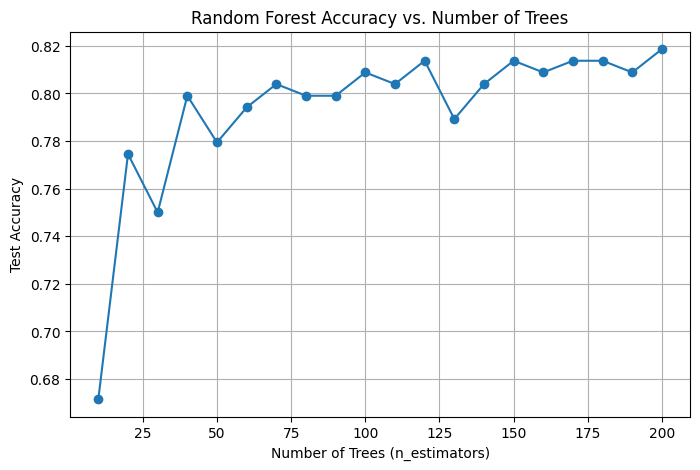

Best accuracy: 0.8186 with 200 trees


In [4]:
# Use this cell for your code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

tree_counts = range(10, 201, 10)
accuracies = []

for n_trees in tree_counts:
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(training_data, train_target)
    preds = rf.predict(test_data)
    acc = accuracy_score(test_target, preds)
    accuracies.append(acc)

plt.figure(figsize=(8,5))
plt.plot(tree_counts, accuracies, marker='o')
plt.title("Random Forest Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

best_trees = tree_counts[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"Best accuracy: {best_acc:.4f} with {best_trees} trees")


3. If we had picked the amount of decision trees by taking the value with the best test accuracy from the last plot, we would have *overfit* our hyperparameters to the test data. Can you see why it is a mistake to tune hyperparameters of your model by using the test data?

using test daa for tuning causes it to train on test data set making it too optimistic


4. Reshuffle and resplit the data so that it is divided in 3 parts: training (80%), validation (10%) and test (10%). Repeatedly train a model of your choosing (e.g random forest) on the training data, and evaluate it’s performance on the validation set, while tuning the hyperparameters so that the accuracy on the validation set increases. Then, finally evaluate the performance of your model on the test data. What can you say in terms of the generalization of your model?

In [5]:
# Use this cell for your code
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    training_data, train_target, test_size=0.2, random_state=42, shuffle=True
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True
)

print(f"Training size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")


Training size: 652
Validation size: 82
Test size: 82


**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | TPOT

The process of picking a suitable model, evaluating its performance and tuning the hyperparameters is very time consuming. A new idea in machine learning is the concept of automating this by using an optimization algorithm to find the best model in the space of models and their hyperparameters. Have a look at [TPOT](https://github.com/EpistasisLab/tpot), an automated ML solution that finds a good model and a good set of hyperparameters automatically. Try it on this data, it should outperform simple models like the ones we tried easily. Note that running the algorithm might take a while, depending on the strength of your computer. 

*Note*: In case it is running for too long, try checking if the parameters you are using when calling TPOT are reasonable, i.e. try reducing number of ‘generations’ or ‘population_size’. TPOT uses cross-validation internally, so we don’t need our own validation set.

In [ ]:
# Use this cell for your code
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    training_data, train_target, test_size=0.2, random_state=42
)

tpot = TPOTClassifier(
    generations=3,
    population_size=20,
    random_state=42,
    max_time_mins=10,
    n_jobs=4
)

tpot.fit(X_train, y_train)

y_pred = tpot.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"TPOT test accuracy: {test_acc:.4f}")

/home/kazan/Desktop/IntroToDS/.venv/lib/python3.10/site-packages/tpot/tpot_estimator/estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
/home/kazan/Desktop/IntroToDS/.venv/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40295 instead
  warnings.warn(
/home/kazan/Desktop/IntroToDS/.venv/lib/python3.10/site-packages/tpot/tpot_estimator/estimator.py:537: UserWarning: Labels are not encoded as ints from 0 to N. For compatibility with some classifiers such as sklearn, TPOT has encoded y with the sklearn LabelEncoder. When using pipelines outside the main TPOT estimator class, you can encode the labels with est.label_encoder_
  warnings.warn("Labels are not encoded as ints from 0 

KeyError: "None of [Index(['Eval Error'], dtype='object')] are in the [index]"

Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/kazan/Desktop/IntroToDS/.venv/lib/python3.10/site-packages/distributed/process.py", line 202, in _run
    target(*args, **kwargs)
  File "/home/kazan/Desktop/IntroToDS/.venv/lib/python3.10/site-packages/distributed/nanny.py", line 1023, in _run
    asyncio_run(run(), loop_factory=get_loop_factory())
  File "/home/kazan/Desktop/IntroToDS/.venv/lib/python3.10/site-packages/distributed/compatibility.py", line 236, in asyncio_run
    return loop.run_until_complete(main)
  File "/usr/lib/python3.10/asyncio/base_events.py", line 636, in run_until_complete
    self.run_forever()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    self._run_once()
  File "/usr/li

## I was unable to run this on my laptop for some reason

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**